In [1]:
drive_path = 'c:/'
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
from scipy.stats import anderson_ksamp
from scipy.stats import kruskal
from scipy.stats import variation
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from scipy.stats import nanmean
from scipy.stats import nanstd

In [2]:
filename='C:\Users\Annie\Documents\Data\Ca_Imaging\Analysis\\Odor_Panel\\Odor_Trials.csv'
trials=pd.read_csv(filename)

# Figure 1: Graph individual traces

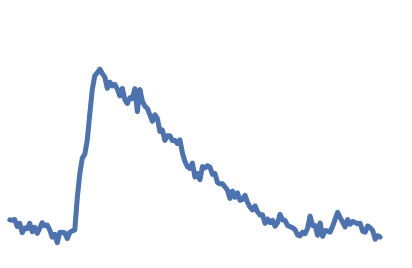

In [152]:
cell=5
trial=39
filename='C:\Users\Annie\Documents\Data\Ca_Imaging\GoodFiles\\160328_1\\%sdt.txt'%trial
comp=pd.read_csv(filename,index_col=0)
ncomp=pd.DataFrame(comp[1:150]['G PMT (%s)'%cell])
ncomp['frame'] = ncomp.index
ncomp['time']=ncomp.frame*0.157
sns.set(style="white")
sns.set_style("ticks")
sns.set_context("paper",font_scale=3);
f,ax=plt.subplots()
ax.plot(ncomp['time'],ncomp.iloc[:,0],linewidth=5.0)
sns.despine(left=True,bottom=True)
plt.ylim(-0.15, 1);
# plt.xticks(np.arange(0, 25.197, 5.0))
ax.set_yticks([]);
ax.set_xticks([]);
plt.tight_layout();
# f.savefig("C:\Users\Annie\Desktop\Plasticity\Figures\SampleTraces\HighRes\Ticks\cell%s_%s.pdf"%(cell,trial))

# Figure 2: Baseline and Peak, Integral

In [18]:
x='C:\Users\Annie\Documents\Data\Ca_Imaging\GoodFiles\\fullbaseline_WL.csv'
baseline=pd.read_csv(x)
y='C:\Users\Annie\Documents\Data\Ca_Imaging\GoodFiles\\fullintegral_WL.csv'
integral=pd.read_csv(y)
z='C:\Users\Annie\Documents\Data\Ca_Imaging\GoodFiles\\fullpeak_WL.csv'
peak=pd.read_csv(z)
s='C:\Users\Annie\Documents\Data\Ca_Imaging\GoodFiles\\fullsuccess_WI.csv'
success=pd.read_csv(s)

In [19]:
melt_base=pd.melt(baseline,('Mouse','Group'),var_name='Odor')
melt_int=pd.melt(integral,('Mouse','Group'),var_name='Odor')
melt_success=pd.melt(success,('Mouse','Group'),var_name='Odor')
melt_peak=pd.melt(peak,('Mouse','Group'),var_name='Odor')

In [20]:
#THE ENTIRE DATAFRAME
completedf=pd.concat([melt_base[['Mouse','Group','Odor','value']],melt_int['value'],melt_peak['value'],melt_success['value']],axis=1)
completedf.columns=['Mouse','Group','Odor','Baseline','Integral','Peak','Success']

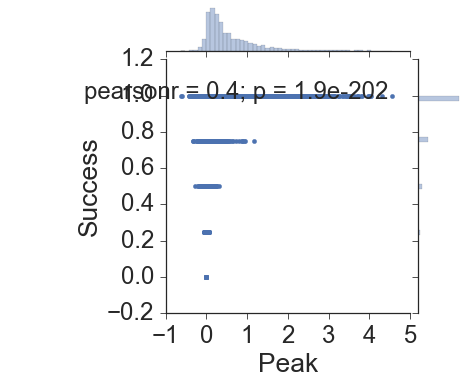

In [21]:
sns.jointplot('Peak','Success',completedf[completedf.Group=='Hexanal']);

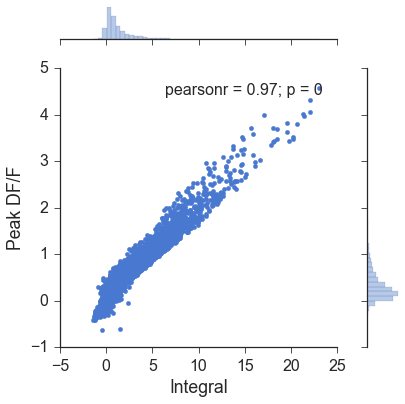

In [29]:
#GRAPH THE INTERACTIONS
sns.set(style='white',palette="muted", color_codes=True);
sns.set_style("ticks")
sns.set_context("paper",font_scale=2);
sns.jointplot('Integral','Peak',completedf).set_axis_labels("Integral", "Peak DF/F");
# sns.despine(right=True,top=True);
plt.tight_layout();
plt.savefig("C:\Users\Annie\Desktop\Plasticity\Figures\Correlations\Ticks\Integral_Peak.pdf")

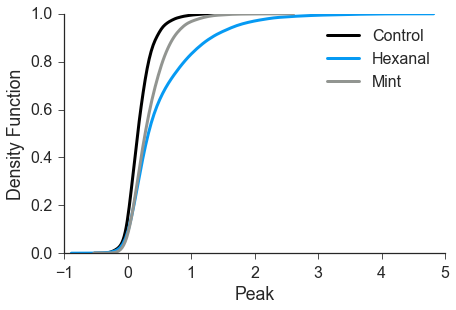

In [23]:
sns.set(style='white');
sns.set_style("ticks")
sns.set_context("paper",font_scale=2);
x=melt_peak[melt_peak.Group=='Control'].value.dropna();
y=melt_peak[melt_peak.Group=='Hexanal'].value.dropna();
z=melt_peak[melt_peak.Group=='Mint'].value.dropna();
sns.kdeplot(x,cumulative=True,color='black',lw=3,label='Control')
sns.kdeplot(y,cumulative=True,color=sns.xkcd_rgb["azure"],lw=3,label='Hexanal')
sns.kdeplot(z,cumulative=True,color=sns.xkcd_rgb['grey'],lw=3,label='Mint')
# sns.kdeplot(y,cumulative=True)
# sns.kdeplot(z,cumulative=True)
# sns.distplot(x,hist=False,color=sns.xkcd_rgb["black"],kde_kws={'lw':3,'label':'Control'},norm_hist=True);
# sns.distplot(y,hist=False,color=sns.xkcd_rgb["azure"],kde_kws={'lw':3,'label':'Hexanal'});
# sns.distplot(z,hist=False,color=sns.xkcd_rgb["grey"],kde_kws={'lw':3,'label':'Mint'});
sns.despine();
plt.tight_layout();
plt.xlabel('Peak');
plt.ylabel('Density Function');
plt.savefig("C:\Users\Annie\Desktop\Plasticity\Figures\Correlations\Ticks\Density.pdf")

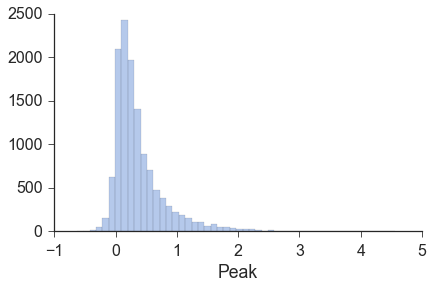

In [24]:
x=completedf.Peak.dropna()
sns.set(style='white',palette="muted", color_codes=True);
sns.set_style("ticks")
sns.set_context("paper",font_scale=2);
sns.distplot(x,kde=False);
sns.despine(right=True,top=True);
plt.tight_layout();
plt.savefig("C:\Users\Annie\Desktop\Plasticity\Figures\Correlations\Ticks\Hist_Peak.pdf")

# Figure 3: Habituation

In [25]:
h='C:\Users\Annie\Documents\Data\Ca_Imaging\HabituationFiles\NormalizedHabituation.csv'
habituation=pd.read_csv(h)

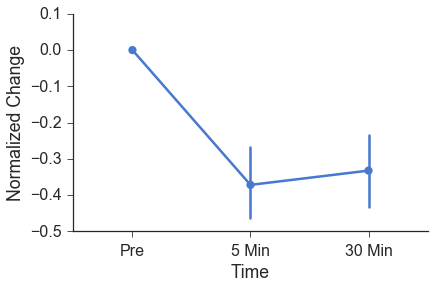

In [30]:
h=pd.melt(habituation,var_name='Time',value_name='Normalized Change');
sns.set(style='white',palette="muted", color_codes=True);
sns.set_style("ticks")
sns.set_context("paper",font_scale=2);
sns.pointplot(x='Time',y='Normalized Change',data=h);
plt.ylabel('Normalized Change')
sns.despine();
plt.tight_layout();
plt.savefig("C:\Users\Annie\Desktop\Plasticity\Figures\Habituation_ticks.pdf")

# Prep Peaks Dataframe

In [31]:
filename='C:\Users\Annie\Documents\Data\Ca_Imaging\GoodFiles\\fullpeak.csv'
comp=pd.read_csv(filename)
comp_sorted=comp.reindex_axis(comp.mean().sort_values().index, axis=1)
comp_labels=pd.DataFrame(comp.Mouse)
comp_group=pd.DataFrame(comp.Group)
tmp=[comp_group,comp_labels,comp_sorted]
composite_full=pd.concat(tmp,axis=1)
cfull=pd.melt(composite_full,['Group','Mouse'],var_name="Odor")

In [32]:
groupcolors={'Control':sns.xkcd_rgb["black"],'Mint':sns.xkcd_rgb["grey"],'Hexanal':sns.xkcd_rgb["azure"]};

In [33]:
#Make separate excitatory and inhibitory dataframes
mindf=pd.DataFrame([])
maxdf=pd.DataFrame([])
zdf=pd.DataFrame([])
for x in cfull.index:
    if cfull.value[x]>0:
        a=pd.DataFrame(cfull.iloc[x]).T
        maxdf=maxdf.append(a,ignore_index=True)
    elif cfull.value[x]<0:
        a=pd.DataFrame(cfull.iloc[x]).T
        mindf=mindf.append(a,ignore_index=True)
    else:
        a=pd.DataFrame(cfull.iloc[x]).T
        zdf=zdf.append(a,ignore_index=True)

In [34]:
one_mindf=mindf[['Group','Odor','value']][mindf.Odor.isin(['MS01','Hexanal01','IAA01','THA','AP','PA','Hexanone','EB'])]
conc_mindf=mindf[['Group','Odor','value']][mindf.Odor.isin(['MS01','MS05','MS10','Hexanal01','Hexanal05','Hexanal10','IAA01','IAA05','IAA10'])]
conc_mindf=conc_mindf.sort_values(by='Odor')

one_maxdf=maxdf[['Group','Odor','value']][maxdf.Odor.isin(['MS01','Hexanal01','IAA01','THA','AP','PA','Hexanone','EB'])]
conc_maxdf=maxdf[['Group','Odor','value']][maxdf.Odor.isin(['MS01','MS05','MS10','Hexanal01','Hexanal05','Hexanal10','IAA01','IAA05','IAA10'])]

one_mindf=one_mindf.replace(to_replace='MS01',value='MS')
one_mindf=one_mindf.replace(to_replace='Hexanal01',value='Hexanal')
one_mindf=one_mindf.replace(to_replace='IAA01',value='IAA')

one_maxdf=one_maxdf.replace(to_replace='MS01',value='MS')
one_maxdf=one_maxdf.replace(to_replace='Hexanal01',value='Hexanal')
one_maxdf=one_maxdf.replace(to_replace='IAA01',value='IAA')

sorter=('MS01','MS05','MS10','IAA01','IAA05','IAA10','Hexanal01','Hexanal05','Hexanal10')
conc_maxdf.Odor=conc_maxdf.Odor.astype('category')
conc_maxdf.Odor.cat.set_categories(sorter,inplace=True)
conc_maxdf=conc_maxdf.sort_values(['Odor'])

conc_mindf.Odor=conc_mindf.Odor.astype('category')
conc_mindf.Odor.cat.set_categories(sorter,inplace=True)
conc_mindf=conc_mindf.sort_values(['Odor'])

conc_mindf=conc_mindf.replace(to_replace='MS01',value='MS 1%')
conc_mindf=conc_mindf.replace(to_replace='MS05',value='MS 5%')
conc_mindf=conc_mindf.replace(to_replace='MS10',value='MS 10%')
conc_mindf=conc_mindf.replace(to_replace='IAA01',value='IAA 1%')
conc_mindf=conc_mindf.replace(to_replace='IAA05',value='IAA 5%')
conc_mindf=conc_mindf.replace(to_replace='IAA10',value='IAA 10%')
conc_mindf=conc_mindf.replace(to_replace='Hexanal01',value='Hexanal 1%')
conc_mindf=conc_mindf.replace(to_replace='Hexanal05',value='Hexanal 5%')
conc_mindf=conc_mindf.replace(to_replace='Hexanal10',value='Hexanal 10%')

conc_maxdf=conc_maxdf.replace(to_replace='MS01',value='MS 1%')
conc_maxdf=conc_maxdf.replace(to_replace='MS05',value='MS 5%')
conc_maxdf=conc_maxdf.replace(to_replace='MS10',value='MS 10%')
conc_maxdf=conc_maxdf.replace(to_replace='IAA01',value='IAA 1%')
conc_maxdf=conc_maxdf.replace(to_replace='IAA05',value='IAA 5%')
conc_maxdf=conc_maxdf.replace(to_replace='IAA10',value='IAA 10%')
conc_maxdf=conc_maxdf.replace(to_replace='Hexanal01',value='Hexanal 1%')
conc_maxdf=conc_maxdf.replace(to_replace='Hexanal05',value='Hexanal 5%')
conc_maxdf=conc_maxdf.replace(to_replace='Hexanal10',value='Hexanal 10%')

In [35]:
cat=('Control','Mint','Hexanal')

In [ ]:
amp=pd.read_csv(

# Figure 4-5: Amplitude of excitatory responses/BOXPLOTS

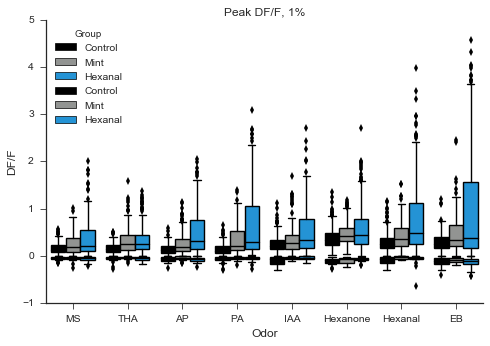

In [37]:
#1% CONCENTRATION
cat=('Control','Mint','Hexanal')
sns.set(style="white", palette="muted", color_codes=True);
sns.set_context("paper", font_scale=1.3);
sns.set_style("ticks")
plt.figure(figsize=(7,5));
sns.boxplot(x='Odor',y='value',hue_order=cat,hue='Group',palette=groupcolors,data=one_maxdf);
sns.boxplot(x='Odor',y='value',hue_order=cat,hue='Group',palette=groupcolors,data=one_mindf);
# ax.legend_.remove()
sns.despine()
plt.ylabel('DF/F', fontsize=12);
plt.title('Peak DF/F, 1%', fontsize=12);
plt.xlabel('Odor', fontsize=12);
plt.ylim(-1,5)
plt.tight_layout()
plt.savefig("C:\Users\Annie\Desktop\Plasticity\Figures\\Box\\box_ticks.pdf")

In [38]:
MS_conc_maxdf=conc_maxdf[conc_maxdf.Odor.isin(['MS 1%','MS 5%','MS 10%'])]
hex_conc_maxdf=conc_maxdf[conc_maxdf.Odor.isin(['Hexanal 1%','Hexanal 5%','Hexanal 10%'])]
IAA_conc_maxdf=conc_maxdf[conc_maxdf.Odor.isin(['IAA 1%','IAA 5%','IAA 10%'])]

MS_conc_mindf=conc_mindf[conc_mindf.Odor.isin(['MS 1%','MS 5%','MS 10%'])]
hex_conc_mindf=conc_mindf[conc_mindf.Odor.isin(['Hexanal 1%','Hexanal 5%','Hexanal 10%'])]
IAA_conc_mindf=conc_mindf[conc_mindf.Odor.isin(['IAA 1%','IAA 5%','IAA 10%'])]

In [117]:
conc_maxdf

,Group,Odor,value
0,Control,MS 1%,0.015671
512,Hexanal,MS 1%,0.216320
513,Hexanal,MS 1%,0.200734
514,Hexanal,MS 1%,0.126636
515,Hexanal,MS 1%,0.146380
516,Hexanal,MS 1%,0.209309
517,Hexanal,MS 1%,0.299622
518,Hexanal,MS 1%,0.148053
519,Hexanal,MS 1%,0.086919
520,Hexanal,MS 1%,0.024138


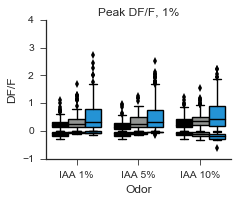

In [41]:
#Multiple Concentration
cat=('Control','Mint','Hexanal')
sns.set(style="white", palette="muted", color_codes=True);
sns.set_context("paper", font_scale=1.3);
sns.set_style("ticks")
plt.figure(figsize=(3.5,3));
sns.boxplot(x='Odor',y='value',hue_order=cat,hue='Group',palette=groupcolors,data=IAA_conc_mindf);
ax=sns.boxplot(x='Odor',y='value',hue_order=cat,hue='Group',palette=groupcolors,data=IAA_conc_maxdf);
ax.legend_.remove()
sns.despine()
plt.ylabel('DF/F', fontsize=12);
plt.title('Peak DF/F, 1%', fontsize=12);
plt.xlabel('Odor', fontsize=12);
plt.ylim(-1,4)
plt.tight_layout()
plt.savefig("C:\Users\Annie\Desktop\Plasticity\Figures\\Box\\IAA_conc_ticks.pdf")

# Figure 4-5: MEDIAN

1%

In [42]:
#MEDIANS for 1%
medians=pd.DataFrame([])
df=one_maxdf
for x in df.Group.unique():
    tmp=pd.DataFrame([])
    for y in df.Odor.unique():
        a=df[(df.Group==x)&(df.Odor==y)]['value'].dropna().median()
        m=pd.DataFrame({y:[a]})
        tmp=pd.concat([tmp,m],axis=1)
    b=pd.DataFrame({'Group':[x]})
#     c=pd.DataFrame({'Group':[df[df.Mouse==x]['Group'].iloc[0]]})
#     c=c.reset_index(drop=True)
    tmp=pd.concat([b,tmp],axis=1)
    medians=medians.append(tmp)
maxmedianmelt=pd.melt(medians,"Group",var_name="Odor")

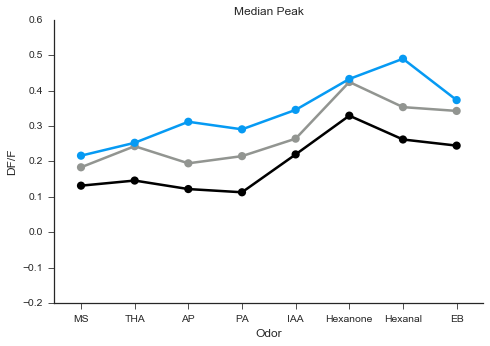

In [44]:
#Plot everything by group
sns.set(style="white", palette="muted", color_codes=True);
sns.set_context("paper", font_scale=1.3);
sns.set_style("ticks")
plt.figure(figsize=(7,5));
ax=sns.pointplot(x='Odor',y='value',hue='Group',palette=groupcolors,data=maxmedianmelt)
# sns.pointplot(x='Odor',y='value',hue='Group',palette=groupcolors,data=minmedianmelt)
ax.legend_.remove()
sns.despine()
plt.ylabel('DF/F', fontsize=12);
plt.title('Median Peak', fontsize=12);
plt.xlabel('Odor', fontsize=12);
plt.ylim(-0.2,0.6)
plt.tight_layout();
plt.savefig("C:\Users\Annie\Desktop\Plasticity\Figures\\Median\\Median_one_ticks.pdf")

Concentrations

In [50]:
#MEDIANS
medians=pd.DataFrame([])
# df=MS_conc_maxdf
df=hex_conc_maxdf
# df=IAA_conc_maxdf
for x in df.Group.unique():
    tmp=pd.DataFrame([])
    for y in df.Odor.unique():
        a=df[(df.Group==x)&(df.Odor==y)]['value'].dropna().median()
        m=pd.DataFrame({y:[a]})
        tmp=pd.concat([tmp,m],axis=1)
    b=pd.DataFrame({'Group':[x]})
#     c=pd.DataFrame({'Group':[df[df.Mouse==x]['Group'].iloc[0]]})
#     c=c.reset_index(drop=True)
    tmp=pd.concat([b,tmp],axis=1)
    medians=medians.append(tmp)
maxmedianmelt=pd.melt(medians,"Group",var_name="Odor")

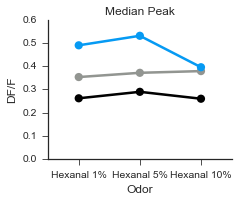

In [51]:
#Plot everything by group
sns.set(style="white", palette="muted", color_codes=True);
sns.set_context("paper", font_scale=1.3);
sns.set_style("ticks")
plt.figure(figsize=(3.5,3));
ax=sns.pointplot(x='Odor',y='value',hue='Group',palette=groupcolors,data=maxmedianmelt)
# sns.pointplot(x='Odor',y='value',hue='Group',palette=groupcolors,data=minmedianmelt)
ax.legend_.remove()
sns.despine()
plt.ylabel('DF/F', fontsize=12);
plt.title('Median Peak', fontsize=12);
plt.xlabel('Odor', fontsize=12);
plt.ylim(0,0.6)
plt.tight_layout();
plt.savefig("C:\Users\Annie\Desktop\Plasticity\Figures\\Median\\Median_hex_ticks.pdf")

# Figure 6: Number of excitatory events

In [52]:
filename='C:\Users\Annie\Documents\Data\Ca_Imaging\GoodFiles\\fullpeak.csv'
comp=pd.read_csv(filename)
comp_sorted=comp.reindex_axis(comp.mean().sort_values().index, axis=1)
comp_labels=pd.DataFrame(comp.Mouse)
comp_group=pd.DataFrame(comp.Group)
tmp=[comp_group,comp_labels,comp_sorted]
composite_full=pd.concat(tmp,axis=1)
cfull=pd.melt(composite_full,['Group','Mouse'],var_name="Odor")

maxdf=pd.DataFrame([])
zdf=pd.DataFrame([])
for x in cfull.index:
    if cfull.value[x]>0:
        a=pd.DataFrame(cfull.iloc[x]).T
        maxdf=maxdf.append(a,ignore_index=True)
    else:
        a=pd.DataFrame(cfull.iloc[x]).T
        zdf=zdf.append(a,ignore_index=True)
zdf=zdf.dropna()

In [53]:
ratio=pd.DataFrame([])
for x in maxdf.Group.unique():
    for y in maxdf.Odor.unique():
        a=float(len(maxdf[(maxdf.Group==x) & (maxdf.Odor==y)]['value']))
        b=float(len(zdf[(zdf.Group==x) & (zdf.Odor==y)]['value']))
        E=a/(a+b)
        ratio=ratio.append(pd.DataFrame({'Group':[x],'Odor':[y],'Ratio':[E]}))

In [54]:
one_ratio=ratio[['Group','Odor','Ratio']][ratio.Odor.isin(['MS01','Hexanal01','IAA01','THA','AP','PA','Hexanone','EB'])]
conc_ratio=ratio[['Group','Odor','Ratio']][ratio.Odor.isin(['MS01','MS05','MS10','Hexanal01','Hexanal05','Hexanal10','IAA01','IAA05','IAA10'])]
conc_ratio=conc_ratio.sort_values(by='Odor')

one_ratio=one_ratio.replace(to_replace='MS01',value='MS')
one_ratio=one_ratio.replace(to_replace='Hexanal01',value='Hexanal')
one_ratio=one_ratio.replace(to_replace='IAA01',value='IAA')

sorter=('MS01','MS05','MS10','IAA01','IAA05','IAA10','Hexanal01','Hexanal05','Hexanal10')
conc_ratio.Odor=conc_ratio.Odor.astype('category')
conc_ratio.Odor.cat.set_categories(sorter,inplace=True)
conc_ratio=conc_ratio.sort_values(['Odor'])

conc_ratio=conc_ratio.replace(to_replace='MS01',value='MS 1%')
conc_ratio=conc_ratio.replace(to_replace='MS05',value='MS 5%')
conc_ratio=conc_ratio.replace(to_replace='MS10',value='MS 10%')
conc_ratio=conc_ratio.replace(to_replace='IAA01',value='IAA 1%')
conc_ratio=conc_ratio.replace(to_replace='IAA05',value='IAA 5%')
conc_ratio=conc_ratio.replace(to_replace='IAA10',value='IAA 10%')
conc_ratio=conc_ratio.replace(to_replace='Hexanal01',value='Hexanal 1%')
conc_ratio=conc_ratio.replace(to_replace='Hexanal05',value='Hexanal 5%')
conc_ratio=conc_ratio.replace(to_replace='Hexanal10',value='Hexanal 10%')

In [55]:
MS_conc_ratio=conc_ratio[conc_ratio.Odor.isin(['MS 1%','MS 5%','MS 10%'])]
hex_conc_ratio=conc_ratio[conc_ratio.Odor.isin(['Hexanal 1%','Hexanal 5%','Hexanal 10%'])]
IAA_conc_ratio=conc_ratio[conc_ratio.Odor.isin(['IAA 1%','IAA 5%','IAA 10%'])]

In [56]:
one_ratio.to_csv('C:\Users\Annie\Desktop\Plasticity\Stats\\Ratio_One.csv')

In [57]:
MS_conc_ratio.to_csv('C:\Users\Annie\Desktop\Plasticity\Stats\\Ratio_MS.csv')
hex_conc_ratio.to_csv('C:\Users\Annie\Desktop\Plasticity\Stats\\Ratio_hex.csv')
IAA_conc_ratio.to_csv('C:\Users\Annie\Desktop\Plasticity\Stats\\Ratio_IAA.csv')

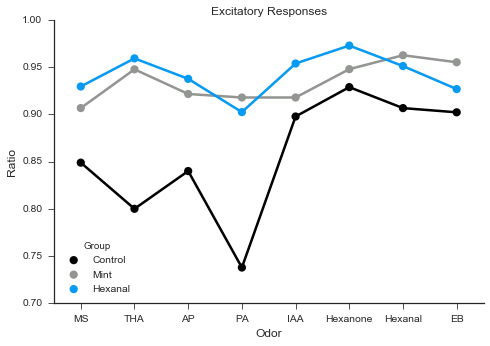

In [60]:
# 1%
sns.set(style="white", palette="muted", color_codes=True);
sns.set_context("paper", font_scale=1.3);
sns.set_style("ticks")
plt.figure(figsize=(7,5));
ax=sns.pointplot(x='Odor',y='Ratio',hue='Group',palette=groupcolors,data=one_ratio)
# ax.legend_.remove()
sns.despine()
plt.ylabel('Ratio', fontsize=12);
plt.title('Excitatory Responses', fontsize=12);
plt.xlabel('Odor', fontsize=12);
# plt.ylim(-0.2,0.6)
plt.tight_layout();
plt.savefig("C:\Users\Annie\Desktop\Plasticity\Figures\\Excitatory\\Excitatory_One_ticks.pdf")

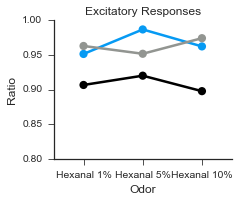

In [63]:
#Different concentrations
sns.set(style="white", palette="muted", color_codes=True);
sns.set_context("paper", font_scale=1.3);
sns.set_style("ticks")
plt.figure(figsize=(3.5,3));
ax=sns.pointplot(x='Odor',y='Ratio',hue='Group',palette=groupcolors,data=hex_conc_ratio)
ax.legend_.remove()
sns.despine()
plt.ylabel('Ratio', fontsize=12);
plt.title('Excitatory Responses', fontsize=12);
plt.xlabel('Odor', fontsize=12);
plt.ylim(0.8,1)
plt.tight_layout();
plt.savefig("C:\Users\Annie\Desktop\Plasticity\Figures\\Excitatory\\Excitatory_hex_ticks.pdf")

# Number of odorants responded to

In [64]:
composite_full=composite_full.drop('Blank',1)

In [65]:
EI=pd.DataFrame([])
for x in composite_full.index:
    a=0
    b=0
    for value in composite_full.iloc[x][2:]:
        if value>0:
            a=a+1
        elif value<0:
            b=b+1
    c=pd.DataFrame(composite_full.iloc[x][['Group','Mouse']]).T
    c=c.reset_index(drop=True)
    d=pd.concat([c,pd.DataFrame({'E':[a]}),pd.DataFrame({'I':[b]})],axis=1)
    EI=EI.append(d)

In [66]:
EI.to_csv('C:\Users\Annie\Desktop\Plasticity\Stats\\Odor_Number.csv')

In [67]:
groupcolors={'Control':sns.xkcd_rgb["black"],'Mint':sns.xkcd_rgb["grey"],'Hexanal':sns.xkcd_rgb["azure"]};

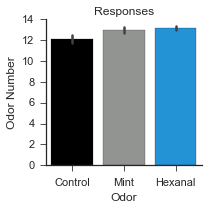

In [70]:
sns.set(style="white")
sns.set_context('paper')
sns.set_style("ticks")
plt.figure(figsize=(3,3))
sns.barplot(x='Group', y="E", data=EI,
            label="E", palette=groupcolors);
sns.despine()
plt.ylabel('Odor Number', fontsize=12);
plt.title('Responses', fontsize=12);
plt.xlabel('Odor', fontsize=12);
plt.xticks(fontsize=11);
plt.yticks(fontsize=11);
plt.tight_layout();
plt.savefig("C:\Users\Annie\Desktop\Plasticity\Figures\\Excitatory\\Odors_ticks.pdf")

# Figure 7: Reliability

In [71]:
z='C:\Users\Annie\Documents\Data\Ca_Imaging\GoodFiles\\fullpeak_WL.csv'
peak=pd.read_csv(z)
s='C:\Users\Annie\Documents\Data\Ca_Imaging\GoodFiles\\fullsuccess_WI.csv'
success=pd.read_csv(s)
melt_success=pd.melt(success,('Mouse','Group'),var_name='Odor')
melt_peak=pd.melt(peak,('Mouse','Group'),var_name='Odor')
rdf=pd.concat([melt_peak[['Mouse','Group','Odor','value']],melt_success['value']],axis=1)
rdf.columns=['Mouse','Group','Odor','Peak','Success']

In [22]:
rdf.tail()

,Mouse,Group,Odor,Peak,Success
12940,G PMT (22)_160626_2,Hexanal,Hexanal05,2.629784,1.0
12941,G PMT (23)_160626_2,Hexanal,Hexanal05,2.228448,1.0
12942,G PMT (24)_160626_2,Hexanal,Hexanal05,2.581529,1.0
12943,G PMT (25)_160626_2,Hexanal,Hexanal05,1.906673,1.0
12944,G PMT (26)_160626_2,Hexanal,Hexanal05,2.273161,1.0


In [72]:
smalldf=pd.DataFrame([])
xdf=pd.DataFrame([])
for x in rdf.Mouse.unique():
    for y in rdf.Odor.unique():
        b=rdf[(rdf.Mouse==x)&(rdf.Odor==y)].Peak.values[0]
        if b>0:
            c=rdf[(rdf.Mouse==x)&(rdf.Odor==y)]
            smalldf=smalldf.append(c,ignore_index=True)
        else:
            a=rdf[(rdf.Mouse==x)&(rdf.Odor==y)]
            xdf=xdf.append(a,ignore_index=True)
xdf=xdf.dropna()

In [73]:
one_r=smalldf[['Group','Odor','Success']][smalldf.Odor.isin(['MS01','Hexanal01','IAA01','THA','AP','PA','Hexanone','EB'])]
conc_r=smalldf[['Group','Odor','Success']][smalldf.Odor.isin(['MS01','MS05','MS10','Hexanal01','Hexanal05','Hexanal10','IAA01','IAA05','IAA10'])]
conc_r=conc_r.sort_values(by='Odor')

sorting=('MS01','THA','AP','PA','IAA01','Hexanone','Hexanal01','EB')
one_r.Odor=one_r.Odor.astype('category')
one_r.Odor.cat.set_categories(sorting,inplace=True)
one_r=one_r.sort_values(['Odor'])

one_r=one_r.replace(to_replace='MS01',value='MS')
one_r=one_r.replace(to_replace='Hexanal01',value='Hexanal')
one_r=one_r.replace(to_replace='IAA01',value='IAA')

sorter=('MS01','MS05','MS10','IAA01','IAA05','IAA10','Hexanal01','Hexanal05','Hexanal10')
conc_r.Odor=conc_r.Odor.astype('category')
conc_r.Odor.cat.set_categories(sorter,inplace=True)
conc_r=conc_r.sort_values(['Odor'])

conc_r=conc_r.replace(to_replace='MS01',value='MS 1%')
conc_r=conc_r.replace(to_replace='MS05',value='MS 5%')
conc_r=conc_r.replace(to_replace='MS10',value='MS 10%')
conc_r=conc_r.replace(to_replace='IAA01',value='IAA 1%')
conc_r=conc_r.replace(to_replace='IAA05',value='IAA 5%')
conc_r=conc_r.replace(to_replace='IAA10',value='IAA 10%')
conc_r=conc_r.replace(to_replace='Hexanal01',value='Hexanal 1%')
conc_r=conc_r.replace(to_replace='Hexanal05',value='Hexanal 5%')
conc_r=conc_r.replace(to_replace='Hexanal10',value='Hexanal 10%')

In [74]:
groupcolors={'Control':sns.xkcd_rgb["black"],'Mint':sns.xkcd_rgb["grey"],'Hexanal':sns.xkcd_rgb["azure"]};

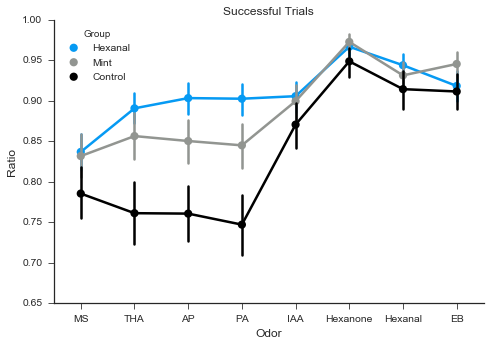

In [75]:
# 1%
sns.set(style="white", palette="muted", color_codes=True);
sns.set_context("paper", font_scale=1.3);
sns.set_style("ticks")
plt.figure(figsize=(7,5));
ax=sns.pointplot(x='Odor',y='Success',hue='Group',palette=groupcolors,data=one_r)
# ax.legend_.remove()
sns.despine()
plt.ylabel('Ratio', fontsize=12);
plt.title('Successful Trials', fontsize=12);
plt.xlabel('Odor', fontsize=12);
# plt.ylim(-0.2,0.6)
plt.tight_layout();
plt.savefig("C:\Users\Annie\Desktop\Plasticity\Figures\\Excitatory\\Successes_One_ticks.pdf")

In [76]:
MS_conc_r=conc_r[conc_r.Odor.isin(['MS 1%','MS 5%','MS 10%'])]
hex_conc_r=conc_r[conc_r.Odor.isin(['Hexanal 1%','Hexanal 5%','Hexanal 10%'])]
IAA_conc_r=conc_r[conc_r.Odor.isin(['IAA 1%','IAA 5%','IAA 10%'])]

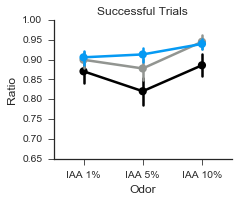

In [79]:
# 1%
sns.set(style="white", palette="muted", color_codes=True);
sns.set_context("paper", font_scale=1.3);
sns.set_style("ticks")
plt.figure(figsize=(3.5,3));
ax=sns.pointplot(x='Odor',y='Success',hue='Group',palette=groupcolors,data=IAA_conc_r)
ax.legend_.remove()
sns.despine()
plt.ylabel('Ratio', fontsize=12);
plt.title('Successful Trials', fontsize=12);
plt.xlabel('Odor', fontsize=12);
plt.ylim(0.65,1)
plt.tight_layout();
plt.savefig("C:\Users\Annie\Desktop\Plasticity\Figures\\Excitatory\\Successes_IAA_ticks.pdf")

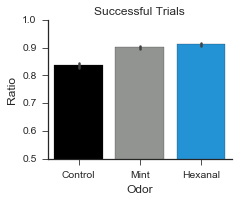

In [80]:
#boxplots
sns.set(style="white", palette="muted", color_codes=True);
sns.set_context("paper", font_scale=1.3);
sns.set_style("ticks")
plt.figure(figsize=(3.5,3));
ax=sns.barplot(x='Group',y='Success',palette=groupcolors,data=smalldf)
# ax.legend_.remove()
sns.despine()
plt.ylabel('Ratio', fontsize=12);
plt.title('Successful Trials', fontsize=12);
plt.xlabel('Odor', fontsize=12);
plt.ylim(0.5,1)
plt.tight_layout();
plt.savefig("C:\Users\Annie\Desktop\Plasticity\Figures\\Excitatory\\Successes_Summary_ticks.pdf")

In [32]:
# smalldf.to_csv('C:\Users\Annie\Desktop\Plasticity\Stats\\Success.csv')

In [85]:
# mint=one_r[one_r.Group=='Mint']
# hexanal=one_r[one_r.Group=='Hexanal']
# control=one_r[one_r.Group=='Control']

In [90]:
# MS_conc_r.to_csv('C:\Users\Annie\Desktop\Plasticity\Stats\\Success_MS.csv')
hex_conc_r.to_csv('C:\Users\Annie\Desktop\Plasticity\Stats\\Success_hex.csv')
# IAA_conc_r.to_csv('C:\Users\Annie\Desktop\Plasticity\Stats\\Success_IAA.csv')

# Make some ranks

Ranking Example

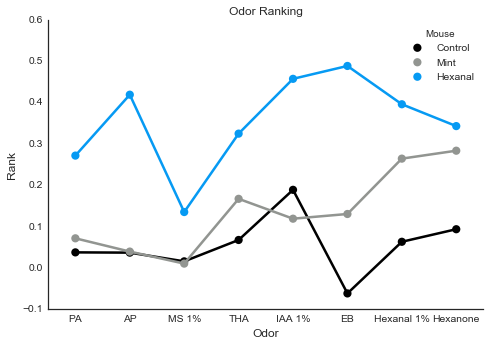

In [81]:
#Amplitude
filename='C:\Users\Annie\Desktop\Plasticity\Figures\Ranks\\Example_amp.csv'
comp=pd.read_csv(filename)
groupcolors={'Control':sns.xkcd_rgb["black"],'Mint':sns.xkcd_rgb["grey"],'Hexanal':sns.xkcd_rgb["azure"]};
x=pd.melt(comp,('Mouse'),var_name='Odor',value_name='Rank')

sns.set(style="white", palette="muted", color_codes=True);
sns.set_context("paper", font_scale=1.3);
plt.figure(figsize=(7,5));
ax=sns.pointplot(x='Odor',y='Rank',hue='Mouse',palette=groupcolors,data=x,order=['PA','AP','MS 1%','THA','IAA 1%','EB','Hexanal 1%','Hexanone'])
# ax.legend_.remove()
sns.despine()
plt.ylabel('Rank', fontsize=12);
plt.title('Odor Ranking', fontsize=12);
plt.xlabel('Odor', fontsize=12);
# plt.ylim(-0.2,0.6)
plt.tight_layout();
# plt.savefig("C:\Users\Annie\Desktop\Plasticity\Figures\\Ranks\\Ranks_One_Control_Ordered.tiff")

In [136]:
filename='C:\Users\Annie\Documents\Data\Ca_Imaging\GoodFiles\\fullpeak.csv'
comp=pd.read_csv(filename)
comp_sorted=comp.reindex_axis(comp.mean().sort_values().index, axis=1)
comp_labels=pd.DataFrame(comp.Mouse)
comp_group=pd.DataFrame(comp.Group)
tmp=[comp_group,comp_labels,comp_sorted]
composite_full=pd.concat(tmp,axis=1)

In [121]:
# composite_full=composite_full.drop('Blank',axis=1)
# labels=composite_full.iloc[:,0:2]
# df=composite_full.iloc[:,2:].rank(axis=1)
# rankdf=pd.concat((labels,df),axis=1)

In [137]:
composite_full=composite_full.drop(['Blank','MS05','MS10','Hexanal05','Hexanal10'],axis=1)
# composite_full=composite_full.drop(['Blank'],axis=1)
labels=composite_full.iloc[:,0:2]
df=composite_full.iloc[:,2:].rank(axis=1)
rankdf=pd.concat((labels,df),axis=1)

In [122]:
# rankdf=rankdf.rename(index=str,columns={'MS01':'MS 1%','MS05':'MS 5%','MS10':'MS 10%','IAA01':'IAA 1%','IAA05':'IAA 5%','IAA10':'IAA 10%','Hexanal01':'Hexanal 1%','Hexanal05':'Hexanal 5%','Hexanal10':'Hexanal 10%'})

In [138]:
rankdf=rankdf.rename(index=str,columns={'MS01':'MS 1%','IAA01':'IAA 1%','Hexanal01':'Hexanal 1%'})

In [139]:
allrank=pd.melt(rankdf,('Mouse','Group'),var_name='Odor',value_name='Rank')

In [140]:
control=rankdf[rankdf.Group=='Control'].iloc[:,2:]
mint=rankdf[rankdf.Group=='Mint'].iloc[:,2:]
hexanal=rankdf[rankdf.Group=='Hexanal'].iloc[:,2:]

In [101]:
control.head()

,MS 1%,THA,MS 10%,AP,MS 5%,IAA 5%,PA,IAA 1%,IAA 10%,Hexanal 10%,Hexanone,Hexanal 1%,Hexanal 5%,EB
0,2.0,7.0,12.0,4.0,13.0,3.0,5.0,14.0,10.0,8.0,9.0,6.0,11.0,1.0
1,1.0,11.0,10.0,9.0,13.0,4.0,3.0,14.0,7.0,6.0,2.0,5.0,12.0,8.0
2,1.0,7.0,10.0,3.0,4.0,5.0,9.0,14.0,12.0,11.0,2.0,6.0,13.0,8.0
3,11.0,7.0,5.0,10.0,12.0,9.0,4.0,14.0,2.0,3.0,1.0,8.0,13.0,6.0
4,9.0,2.0,6.0,3.0,7.0,8.0,5.0,12.0,10.0,4.0,1.0,11.0,13.0,14.0


In [125]:
rankms=rankdf[['Group','Mouse','MS 1%','MS 5%','MS 10%']]
rankms=pd.melt(rankms,('Mouse','Group'),var_name='Odor',value_name='Rank')
rankhex=rankdf[['Group','Mouse','Hexanal 1%','Hexanal 5%','Hexanal 10%']]
rankhex=pd.melt(rankhex,('Mouse','Group'),var_name='Odor',value_name='Rank')
rankiaa=rankdf[['Group','Mouse','IAA 1%','IAA 5%','IAA 10%']]
rankiaa=pd.melt(rankiaa,('Mouse','Group'),var_name='Odor',value_name='Rank')

In [141]:
rankone=rankdf[['Group','Mouse','MS 1%','THA','AP','PA','IAA 1%','Hexanone','Hexanal 1%','EB']]
rankone=pd.melt(rankone,('Mouse','Group'),var_name='Odor',value_name='Rank')

In [40]:
# rankone.to_csv('C:\Users\Annie\Desktop\Plasticity\Figures\\Ranks\\Ranks_One.csv')
# rankms.to_csv('C:\Users\Annie\Desktop\Plasticity\Figures\\Ranks\\Ranks_ms.csv')
# rankhex.to_csv('C:\Users\Annie\Desktop\Plasticity\Figures\\Ranks\\Ranks_hex.csv')
# rankiaa.to_csv('C:\Users\Annie\Desktop\Plasticity\Figures\\Ranks\\Ranks_iaa.csv')

In [142]:
groupcolors={'Control':sns.xkcd_rgb["black"],'Mint':sns.xkcd_rgb["grey"],'Hexanal':sns.xkcd_rgb["azure"]};

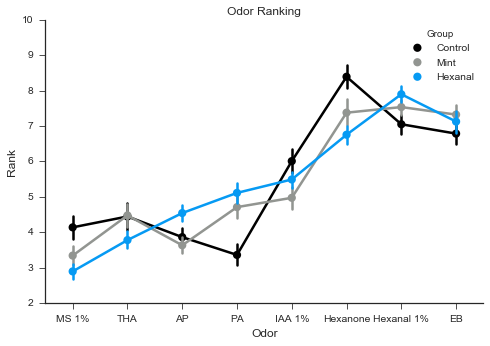

In [143]:
# 1%
sns.set(style="white", palette="muted", color_codes=True);
sns.set_context("paper", font_scale=1.3);
sns.set_style("ticks")
plt.figure(figsize=(7,5));
ax=sns.pointplot(x='Odor',y='Rank',hue='Group',palette=groupcolors,data=rankone)
# ax.legend_.remove()
sns.despine()
plt.ylabel('Rank', fontsize=12);
plt.title('Odor Ranking', fontsize=12);
plt.xlabel('Odor', fontsize=12);
# plt.ylim(-0.2,0.6)
plt.tight_layout();
plt.savefig("C:\Users\Annie\Desktop\Plasticity\Figures\\Ranks\\Ranks_One_170523_ticks.pdf")

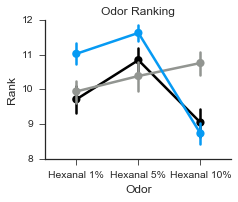

In [135]:
sns.set(style="white", palette="muted", color_codes=True);
sns.set_context("paper", font_scale=1.3);
sns.set_style("ticks")
plt.figure(figsize=(3.5,3));
ax=sns.pointplot(x='Odor',y='Rank',hue='Group',palette=groupcolors,data=rankhex)
ax.legend_.remove()
sns.despine()
plt.ylabel('Rank', fontsize=12);
plt.title('Odor Ranking', fontsize=12);
plt.xlabel('Odor', fontsize=12);
plt.ylim(8,12)
plt.yticks((8,9,10,11,12))
plt.tight_layout();
plt.savefig("C:\Users\Annie\Desktop\Plasticity\Figures\\Ranks\\Ranks_hex_ticks.pdf")

# Within cell comparison of concentrations

In [3]:
filename='C:\Users\Annie\Documents\Data\Ca_Imaging\GoodFiles\\fullpeak_WL.csv'
comp=pd.read_csv(filename)

In [35]:
groupcolors={'Control':sns.xkcd_rgb["black"],'Mint':sns.xkcd_rgb["grey"],'Hexanal':sns.xkcd_rgb["azure"]};

In [46]:
IAAonly=comp[['Group','Mouse','IAA01','IAA05','IAA10']]
values=pd.DataFrame({'IAA 1%':IAAonly['IAA01']/IAAonly['IAA01'],'IAA 5%':IAAonly['IAA05']/IAAonly['IAA01'],'IAA 10%':IAAonly['IAA10']/IAAonly['IAA01']})
temp=IAAonly[['Group','Mouse']]
IAAnorm=pd.concat((temp,values),axis=1)
IAAmelt=pd.melt(IAAnorm,('Mouse','Group'),var_name='Odor',value_name='Peak')

,Group,Mouse,IAA 1%,IAA 10%,IAA 5%
0,Control,G PMT (1)_160321_1,1.0,0.528683,0.181840
1,Control,G PMT (2)_160321_1,1.0,0.220899,0.009612
2,Control,G PMT (3)_160321_1,1.0,0.602885,0.267893
3,Control,G PMT (4)_160321_1,1.0,0.140682,0.419780
4,Control,G PMT (5)_160321_1,1.0,0.786623,0.610787


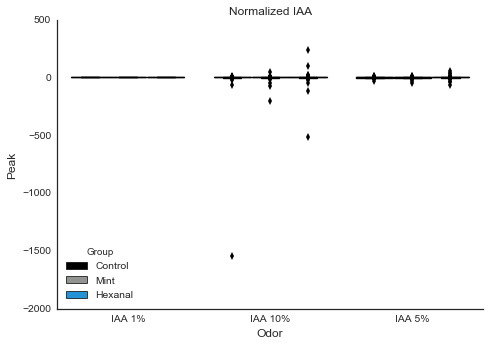

In [50]:
sns.set(style="white", palette="muted", color_codes=True);
sns.set_context("paper", font_scale=1.3);
plt.figure(figsize=(7,5));
ax=sns.boxplot(x='Odor',y='Peak',hue='Group',palette=groupcolors,data=IAAmelt)
# ax.legend_.remove()
sns.despine()
plt.ylabel('Peak', fontsize=12);
plt.title('Normalized IAA', fontsize=12);
plt.xlabel('Odor', fontsize=12);
# plt.ylim(-0.2,0.6)
plt.tight_layout();
# plt.savefig("C:\Users\Annie\Desktop\Plasticity\Figures\\Ranks\\Ranks_One.pdf")

In [51]:
MSonly=comp[['Group','Mouse','MS01','MS05','MS10']]
values=pd.DataFrame({'MS 1%':MSonly['MS01']/MSonly['MS01'],'MS 5%':MSonly['MS05']/MSonly['MS01'],'MS 10%':MSonly['MS10']/MSonly['MS01']})
temp=MSonly[['Group','Mouse']]
MSnorm=pd.concat((temp,values),axis=1)
MSmelt=pd.melt(MSnorm,('Mouse','Group'),var_name='Odor',value_name='Peak')

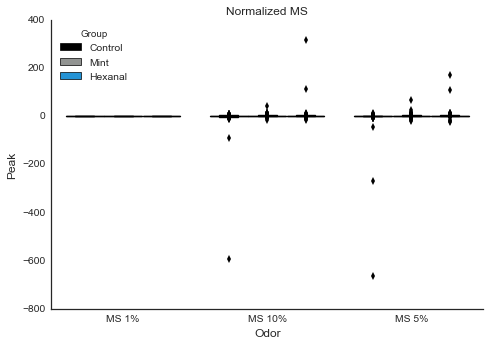

In [56]:
sns.set(style="white", palette="muted", color_codes=True);
sns.set_context("paper", font_scale=1.3);
plt.figure(figsize=(7,5));
ax=sns.boxplot(x='Odor',y='Peak',hue='Group',palette=groupcolors,data=MSmelt)
# ax.legend_.remove()
sns.despine()
plt.ylabel('Peak', fontsize=12);
plt.title('Normalized MS', fontsize=12);
plt.xlabel('Odor', fontsize=12);
# plt.ylim(-0.2,0.6)
plt.tight_layout();
# plt.savefig("C:\Users\Annie\Desktop\Plasticity\Figures\\Ranks\\Ranks_One.pdf")

In [83]:
Hexonly=comp[['Group','Mouse','Hexanal01','Hexanal05','Hexanal10']]
values=pd.DataFrame({'Hexanal 1%':Hexonly['Hexanal01']/Hexonly['Hexanal01'],'Hexanal 5%':Hexonly['Hexanal05']/Hexonly['Hexanal01'],'Hexanal 10%':Hexonly['Hexanal10']/Hexonly['Hexanal01']})
temp=Hexonly[['Group','Mouse']]
Hexnorm=pd.concat((temp,values),axis=1)
Hexmelt=pd.melt(Hexnorm,('Mouse','Group'),var_name='Odor',value_name='Peak')

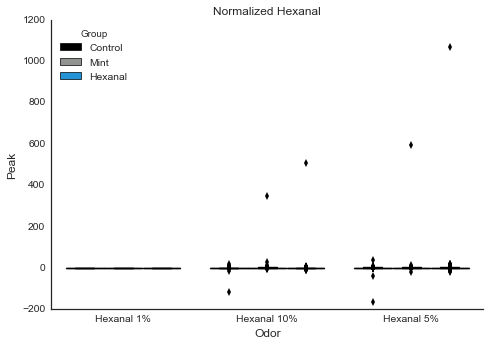

In [84]:
sns.set(style="white", palette="muted", color_codes=True);
sns.set_context("paper", font_scale=1.3);
plt.figure(figsize=(7,5));
ax=sns.boxplot(x='Odor',y='Peak',hue='Group',palette=groupcolors,data=Hexmelt)
# ax.legend_.remove()
sns.despine()
plt.ylabel('Peak', fontsize=12);
plt.title('Normalized Hexanal', fontsize=12);
plt.xlabel('Odor', fontsize=12);
# plt.ylim(-0.2,0.6)
plt.tight_layout();
# plt.savefig("C:\Users\Annie\Desktop\Plasticity\Figures\\Ranks\\Ranks_One.pdf")

In [90]:
Normtotal=pd.concat((IAAnorm,MSnorm[['MS 1%','MS 5%','MS 10%']],Hexnorm[['Hexanal 1%','Hexanal 5%','Hexanal 10%']]),axis=1)

In [98]:
# Normtotal[Normtotal.Group=='Hexanal'].to_csv('C:\Users\Annie\Desktop\Hexanal.csv')

In [103]:
tmp=IAAnorm[IAAnorm.Group=='Control']

In [104]:
tmp.head()

,Group,Mouse,IAA 1%,IAA 10%,IAA 5%
0,Control,G PMT (1)_160321_1,1.0,0.528683,0.181840
1,Control,G PMT (2)_160321_1,1.0,0.220899,0.009612
2,Control,G PMT (3)_160321_1,1.0,0.602885,0.267893
3,Control,G PMT (4)_160321_1,1.0,0.140682,0.419780
4,Control,G PMT (5)_160321_1,1.0,0.786623,0.610787


In [116]:
len(tmp)

225

,Group,Mouse,IAA 1%,IAA 10%,IAA 5%
0,Control,G PMT (1)_160321_1,1.0,0.528683,0.181840
1,Control,G PMT (2)_160321_1,1.0,0.220899,0.009612
2,Control,G PMT (3)_160321_1,1.0,0.602885,0.267893
3,Control,G PMT (4)_160321_1,1.0,0.140682,0.419780
4,Control,G PMT (5)_160321_1,1.0,0.786623,0.610787


In [185]:
tmp=Hexnorm[Hexnorm.Group=='Hexanal']
a=3
b=4
values=[]
for x in range(len(tmp)):
    if tmp.iloc[x,a]>1:
        values.append(tmp.iloc[x,a])
print 'ratio'
print float(len(values))/float(len(tmp))

ratio
0.238482384824


In [198]:
tmp=Hexnorm[Hexnorm.Group=='Control']
a=3
b=4
values=[]
for x in range(len(tmp)):
    if tmp.iloc[x,a]>1 and tmp.iloc[x,b]>1:
        values.append(tmp.iloc[x,a])
print 'both ratio'
print float(len(values))/float(len(tmp))

both ratio
0.253333333333


In [143]:
len(tmp)

225